# Master Notes

### General Process:
**Data Ingestion**
1. Connect
2. Transform
3. Data Clean
- Missing Values- Impute or drop?
- Duplicate columns
- New columns
- Encoding
- Check for outliers and decide to remove or include
4. EDA
- Plotting
- Looking at relationships
- Collinearity
- Multicollinearity
- Pairplots etc. 
5. Statistical Modeling
- Which model?
- Model Evalution
- Model Validation
- Fine tuning
6. Model Deployment
- Final writeup
- Api or batch

### Common Libs
1. Pandas
- allows you to work with dataframes
- used for cleaning data
- used for selecting and manipulating data
- merging and joining
- grouping data
2. Numpy
- math operations
- advanced selection


In [5]:
import pandas as pd
import numpy as np

#### Examples of common code

In [6]:
# set the path
path = '/Users/hannah.westberg/Projects/GA-DS-Repo/ClassMaterial/data/master.csv'


In [7]:
# load data as a csv
# parse dates can be used to load dates as date type. must provide a list
df = pd.read_csv(path, parse_dates=['visit_date'])

In [8]:
# examine top of data
df.head(5)

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN


In [11]:
# examine bottom of data
df.tail(5)

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
252103,air_a17f0778617c76e2,2017-04-21,49,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.0
252104,air_a17f0778617c76e2,2017-04-22,60,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.0
252105,air_a17f0778617c76e2,2017-03-26,69,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.0
252106,air_a17f0778617c76e2,2017-03-20,31,Monday,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.0
252107,air_a17f0778617c76e2,2017-04-09,26,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,32.0


In [12]:
# get data set summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                252108 non-null  object        
 1   visit_date        252108 non-null  datetime64[ns]
 2   visitors          252108 non-null  int64         
 3   day_of_week       252108 non-null  object        
 4   holiday           252108 non-null  int64         
 5   genre             252108 non-null  object        
 6   area              252108 non-null  object        
 7   latitude          252108 non-null  float64       
 8   longitude         252108 non-null  float64       
 9   reserve_visitors  108394 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 19.2+ MB


In [13]:
df.describe()

,visitors,holiday,latitude,longitude,reserve_visitors
count,252108.000000,252108.000000,252108.000000,252108.000000,108394.000000
mean,20.973761,0.050673,35.613121,137.357865,16.699808
std,16.757007,0.219329,2.044473,3.671577,17.388735
min,1.000000,0.000000,33.211967,130.195555,1.000000
25%,9.000000,0.000000,34.692337,135.341564,4.000000
50%,17.000000,0.000000,35.658068,139.670038,10.000000
75%,29.000000,0.000000,35.694003,139.751599,24.000000
max,877.000000,1.000000,44.020632,144.273398,96.000000


In [16]:
# check for dupes
df[df.duplicated()]

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors


In [18]:
# drop nulls
df.isnull().sum()

id                       0
visit_date               0
visitors                 0
day_of_week              0
holiday                  0
genre                    0
area                     0
latitude                 0
longitude                0
reserve_visitors    143714
dtype: int64

In [19]:
# select one column
df['holiday']

0         0
1         0
2         0
3         0
4         0
         ..
252103    0
252104    0
252105    0
252106    1
252107    0
Name: holiday, Length: 252108, dtype: int64

In [20]:
# select multiple columns
df[['holiday', 'day_of_week', 'latitude']]

,holiday,day_of_week,latitude
0,0,Wednesday,35.658068
1,0,Thursday,35.658068
2,0,Friday,35.658068
3,0,Saturday,35.658068
4,0,Monday,35.658068
...,...,...,...
252103,0,Friday,34.695124
252104,0,Saturday,34.695124
252105,0,Sunday,34.695124
252106,1,Monday,34.695124


In [21]:
# grab first 20 rows of a column
df['visitors'][:20]

0     25
1     32
2     29
3     22
4      6
5      9
6     31
7     21
8     18
9     26
10    21
11    11
12    24
13    21
14    26
15     6
16    18
17    12
18    45
19    15
Name: visitors, dtype: int64

In [22]:
# grab the first ten rows grab columns 2-6 
df.iloc[:10, 2:6]

,visitors,day_of_week,holiday,genre
0,25,Wednesday,0,Dining bar
1,32,Thursday,0,Dining bar
2,29,Friday,0,Dining bar
3,22,Saturday,0,Dining bar
4,6,Monday,0,Dining bar
5,9,Tuesday,0,Dining bar
6,31,Wednesday,0,Dining bar
7,21,Thursday,0,Dining bar
8,18,Friday,0,Dining bar
9,26,Saturday,0,Dining bar


In [23]:
#grab every row, but first 10 columns
df.iloc[:, :10]

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
...,...,...,...,...,...,...,...,...,...,...
252103,air_a17f0778617c76e2,2017-04-21,49,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.0
252104,air_a17f0778617c76e2,2017-04-22,60,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.0
252105,air_a17f0778617c76e2,2017-03-26,69,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.0
252106,air_a17f0778617c76e2,2017-03-20,31,Monday,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.0


In [24]:
# if you have an irregular set of indices to lookup- pass into a list
# this grabs every row and only columns 2, 3, 4, 7
df.iloc[:, [2, 3, 4, 7]]

,visitors,day_of_week,holiday,latitude
0,25,Wednesday,0,35.658068
1,32,Thursday,0,35.658068
2,29,Friday,0,35.658068
3,22,Saturday,0,35.658068
4,6,Monday,0,35.658068
...,...,...,...,...
252103,49,Friday,0,34.695124
252104,60,Saturday,0,34.695124
252105,69,Sunday,0,34.695124
252106,31,Monday,1,34.695124


In [25]:
# select based on condition
df[df['visitors'] > 30]

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
6,air_ba937bf13d40fb24,2016-01-20,31,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
18,air_ba937bf13d40fb24,2016-02-05,45,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
22,air_ba937bf13d40fb24,2016-02-10,32,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
30,air_ba937bf13d40fb24,2016-02-19,43,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
...,...,...,...,...,...,...,...,...,...,...
252097,air_a17f0778617c76e2,2017-04-15,61,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,25.0
252103,air_a17f0778617c76e2,2017-04-21,49,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.0
252104,air_a17f0778617c76e2,2017-04-22,60,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.0
252105,air_a17f0778617c76e2,2017-03-26,69,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.0


In [26]:
# selecting based on multiple conditions
df[(df['day_of_week'] == 'Wednesday') & (df['genre'] == 'Dining bar')]

,id,visit_date,visitors,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
6,air_ba937bf13d40fb24,2016-01-20,31,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
12,air_ba937bf13d40fb24,2016-01-27,24,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
16,air_ba937bf13d40fb24,2016-02-03,18,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
22,air_ba937bf13d40fb24,2016-02-10,32,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
...,...,...,...,...,...,...,...,...,...,...
249683,air_16c4cfddeb2cf69b,2017-03-29,15,Wednesday,0,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,4.0
249690,air_16c4cfddeb2cf69b,2017-04-05,6,Wednesday,0,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,2.0
249696,air_16c4cfddeb2cf69b,2017-04-12,12,Wednesday,0,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,2.0
249703,air_16c4cfddeb2cf69b,2017-04-19,8,Wednesday,0,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,NaN


In [27]:
# this selects all rows, but columns where there are nulls
# the second half is essentially a query that helps narrow down 
# to certain columns
df.loc[:, df.isnull().sum()> 0]

,reserve_visitors
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
252103,6.0
252104,37.0
252105,35.0
252106,3.0


In [28]:
# by using axis = 1, we're summing across rows, instead of down columns! 
# So this will select all rows where the count of null across the row == 0 
#. axis = 0 is down a column, axis = 1 is across a row
df.isnull().sum(axis=1)


0         1
1         1
2         1
3         1
4         1
         ..
252103    0
252104    0
252105    0
252106    0
252107    0
Length: 252108, dtype: int64

In [31]:
# create new col with random numbers
df['randNumbers'] = np.random.normal(size=252108)

In [32]:
# if you have a single condition needed to transform data. np.where is a great answers
# example- create a new column to categorize days as being busy or not busy, if there are more 
# than 30 people

df['busy_fl'] = np.where(df['visitors'] >=30, 'busy', 'not busy')

In [33]:
# numpy select- fancier version of the where method.
# create your conditions here

(df['busy_fl'] == 'busy')& (df['randNumbers']<= 0)

0         False
1         False
2         False
3         False
4         False
          ...  
252103    False
252104    False
252105    False
252106    False
252107    False
Length: 252108, dtype: bool

In [35]:
# this is essentially a case statement in SQL or an if/else in regular python
# this is much faster than other ways
# these are essentially the queries
conditions = [(df['busy_fl'] == 'busy')& (df['randNumbers']<= 0),
             (df['busy_fl'] == 'busy')& (df['randNumbers']> 0),
             (df['busy_fl'] == 'not busy')& (df['randNumbers']<= 0),
             (df['busy_fl'] == 'not busy')& (df['randNumbers']>0 )]

# these are the results
result = ['a', 'b', 'c', 'd']

df['newCol2']= np.select(conditions, result, 'Other')

In [36]:
# example merge
df1 = pd.DataFrame({
    'Name': ['Jack', 'John', 'Jill', 'Jane', 'Jorge', 'Joe'],
    'Age': [23, 45, 68, 29, 21, 37],
    'ID': [1, 2, 3, 4, 5, 6]
})

df2 = pd.DataFrame({
    'ID': [2, 3, 4, 6, 8, 10],
    'Name': ['John', 'Jill', 'Jason', 'Jackson', 'Jesse', 'Joe'],
    'Rating': [13.8, 15.1, 9.6, 23.6, 33.5, 7.6]
})

In [37]:
df1.merge(df2, left_on = ['Name', 'ID'], right_on = ['Name', 'ID'])

,Name,Age,ID,Rating
0,John,45,2,13.8
1,Jill,68,3,15.1


# Data Visualization


In [38]:
import matplotlib.pyplot as plt

In [46]:
sports= pd.read_csv('ClassMaterial/Class_05_data_viz/datasets/sports.csv')

In [47]:
sports.head(2)

,Year,Football,Basketball,Baseball,Soccer,Ice hockey,Auto racing,Tennis,Golf,Volleyball,...,Ice/Figure skating,Rodeo,Track and field,Fishing,Swimming,Wrestling,Bowling,Other,None,No opinion
0,2017,37,11,9,7,4,2,2,1,1,...,1,0,0,0,0,0,0,5,15,0
1,2013,39,12,14,4,3,2,3,2,0,...,1,0,1,1,0,0,0,4,11,0


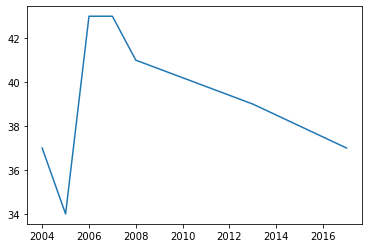

In [49]:
plt.plot(sports['Year'], sports['Football']);

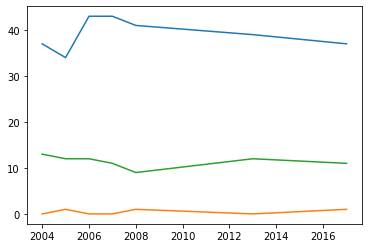

In [50]:
# compare different sports over time
y = sports['Football']
y2 = sports['Volleyball']
y3= sports['Basketball']
x = sports['Year']

fig, ax = plt.subplots()

ax.plot(x, y)
ax.plot(x, y2)
ax.plot(x, y3)
plt.show()

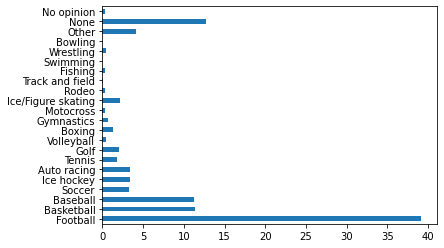

In [52]:
sports.set_index('Year').mean(axis=0).plot(kind='barh');

### Modelling
#### Kinds of ML
1. Supervised- we knwow the label. Given X, can we predict y?
2. Unsupervised- we dont know the label. can the model find patterns in X?
3. Reinforcement Learning- can a virtual agent maximize a reward?

#### Supervised learning
Generally two main types of problems:
1. Classification- can we predict a group or a class? y is categorical. spam, species, malignatn or non malignant etc.  
2. Regression- can we predict a number? y is continuous. how many customers on a given day, expected revenue etc. 

### Linear Regression
- We try to find the equation and the coefficients and intercepts that best fit the data to predict new outcomes. 
- We try to minimize the average of all of the distances of the data points from the prediction. There are multiple metrics for this, but the mean-squared-error (MSE) is generally the best for intepretation- it's a summary of how far off your predictions are from reality.
- to start, we need a matrix for X and y- X are the data features and y is the outcome or target variable. Each row is a single observation; each column in X is a variable

### Linear Regression Process
- inspect relationships between variables - pairplot, or individual plots
- look for correlation - correlation matrix
- check for multicollinearity
- choose features
- Set X (must be at least 2d array)
- Set y
- Train test split- test data is 
- Tranformation- if needed, impute, OHE, Scale, etc. Fit AND transform train data, DO NOT fit test data, only transform. We only want the model to learn from the train data, so that when we eval on the test, it's fair. 
- Look at resulting variables
- Import regressoor from sklearn
- Instantiate regressor
- Fit to training data
- make predictions on the train and the test set, using the mdoel
- Score your model- run mse on y_test and test_preds
- Also run on y_train, train_preds
- This gives you two MSEs- generally smaller is better. I tis rare that the MSE if higher on the train than the test. Usually it's higher for the test. 
- You can also run a k-fold cross validation- this will split your train test split into multiple tests with multiple MSEs. But, grid search will do this and it's more concise.
- this will return score, each corresponded to a fit, Set to MSE- lower is better
- you want the test and train mse to be fairly close. 
- if the train mSE is low but the test MSE is high, we are liekly overfitting the model. If the train MSE is high but the test MSE is low, we might be underfitting our data. 
- to improve the model, you may try choosing different features, or useing polynomial features instead.


In [1]:
# Train test split code: 

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


### Using polynomial features from sci-kit learn example

In [16]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [43]:
#load the cars data, specify car name as index
cars = pd.read_csv('ClassMaterial/Class_08_linear_regression_transformers/data/mtcars.csv', index_col = 0)
#inspect
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [18]:
# Set X and y
X = cars[['mpg', 'disp']]
y = cars['hp']

In [20]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
X_train.head()

,mpg,disp
Merc 450SL,17.3,275.8
Mazda RX4,21.0,160.0
Hornet Sportabout,18.7,360.0
Chrysler Imperial,14.7,440.0
Valiant,18.1,225.0


In [24]:
# instantiate the polynomial features object
# default is degree set to 2, which will generate a quadratic feature
# include_bias is to include an intercept term, which we don't need, so we'll set it to default
# this object works similarly to regression estimator
poly_features = PolynomialFeatures(degree = 2, include_bias=False)


In [25]:
# fit AND transform the train data
X_train_quad = poly_features.fit_transform(X_train)

In [34]:
pd.DataFrame(X_train_quad, columns = poly_features.get_feature_names()).head(5)


,x0,x1,x0^2,x0 x1,x1^2
0,17.3,275.8,299.29,4771.34,76065.64
1,21.0,160.0,441.00,3360.00,25600.00
2,18.7,360.0,349.69,6732.00,129600.00
3,14.7,440.0,216.09,6468.00,193600.00
4,18.1,225.0,327.61,4072.50,50625.00


In [27]:
# only transform the test data
X_test_quad = poly_features.transform(X_test)

In [35]:
pd.DataFrame(X_test_quad, columns = poly_features.get_feature_names()).head(5)


,x0,x1,x0^2,x0 x1,x1^2
0,19.7,145.0,388.09,2856.50,21025.00
1,10.4,460.0,108.16,4784.00,211600.00
2,19.2,400.0,368.64,7680.00,160000.00
3,32.4,78.7,1049.76,2549.88,6193.69
4,22.8,140.8,519.84,3210.24,19824.64


In [36]:
# instantiate the lr model
lr = LinearRegression()

In [37]:
# fit the model
lr_quad = lr.fit(X_train_quad, y_train)

In [38]:
# coefficients on the quadratic model
lr_quad.coef_

array([-2.07632037e+01,  1.95878568e-01,  3.61530586e-01,  1.28530667e-02,
       -2.13329733e-04])

In [39]:
# intercept on the quadratic model
lr_quad.intercept_

317.80023213259216

In [44]:
# make predictions on the test data
preds = lr_quad.predict(X_test_quad)

In [46]:
from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test, squared=False)

59.34454081128458

## Transformers
- transformers are tools that help you transform data sets to prep for modelling
- You can use transformers to simplify data processing- for examplee- OHE, imputers, standard scaler etc. 
## Fit and Transform
- fit : transformer is learning on the data
- transform : transformer is using what it learned on the data to accomplish something
- this only applies to transformer objects, not model objects. 

Examples:

#### CountVectorizer:
- fit learns the vocab
-tramsform creates a document-term matrix using the vocab

#### Simple Imputer
- fit learns the value to impute
- transform fills in missing entries using the imputation value

#### StandardScaler
- fit learns the mean and scales of each features
- transofrm standarsizes the features using the mean and the scale

#### HashingVectorizer
- fit is not used, and thus knowns as a stateless transformer
- transformer creates the document-term matrix using the hash of the token


### transformer example

In [164]:
tips = pd.read_csv('ClassMaterial/Class_08_linear_regression_transformers/data/tips_miss.csv', index_col=0)

In [165]:
# this data set has some categorical variable that we will need to encode
# let's also suppose that we're going to use KNN so we need to scale
# we can do this all with a transformer
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,NaN,Dinner,3.0
3,23.68,3.31,Male,NaN,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [166]:
# set features and target variables
X = tips[['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['tip']

In [167]:
# train test split - always do this before transforming data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [168]:
# looks like there are some null values!
tips.isnull().sum()

total_bill    24
tip            0
sex           24
smoker        24
day           24
time          24
size          24
dtype: int64

In [169]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(drop='if_binary')
imp_mean=SimpleImputer(strategy='mean')
imp_freq= SimpleImputer(strategy='most_frequent')

# build a transformer - we set each transformation step as a tuple
# note, if you need to transform a columnb multiple times, like imputing and then ohe, you will
# need to use a pipeline instead of a transformer: https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260
ct = make_column_transformer(
    (imp_mean, ['total_bill' ,'tip','size']),
    (imp_freq, ['sex' ,'smoker','day','time']),
    (ohe, ['sex' ,'smoker','day','time']),
    remainder='passthrough')


# ct = make_column_transformer(
#  (SimpleImputer(strategy='mean'), ['total_bill' ,'tip','size']),
# remainder='passthrough')


In [171]:
# fit and transform train
X_train_trfm = ct.fit_transform(X_train)

In [175]:
pd.DataFrame(X_train_trfm, columns=ct.get_feature_names())

AttributeError: Transformer simpleimputer-1 (type SimpleImputer) does not provide get_feature_names.

In [162]:
#only transform test
ct.transform(X_test)

array([[19.82, 3.18, 2.6036585365853657, ..., 1.0, 0.0, 0.0],
       [8.77, 2.0, 2.0, ..., 1.0, 0.0, 0.0],
       [24.55, 2.0, 4.0, ..., 1.0, 0.0, 0.0],
       ...,
       [17.26, 2.74, 3.0, ..., 1.0, 0.0, 0.0],
       [15.69, 3.0, 3.0, ..., 1.0, 0.0, 0.0],
       [20.513493975903614, 5.14, 5.0, ..., 1.0, 0.0, 0.0]], dtype=object)

1. Use Simple Imputer to fill nulls. You can choose to fill with mean, median, mode, or a value you provide 

In [67]:
from sklearn.impute import SimpleImputer

In [78]:
# freqency imputer
si_freq = SimpleImputer(strategy='most_frequent')

In [82]:
# finds rows that need to be filled, based on frequency
si_freq.fit(X_train[['sex' ,'smoker','day','time']])

SimpleImputer(strategy='most_frequent')

In [86]:
# transform frqeuency columns
X_train_imputed1 = si_freq.transform(X_train[['sex' ,'smoker','day','time']])
                                                                            

In [87]:
# mean imputer
si_mean = SimpleImputer(strategy='mean')

In [97]:
# finds rows that need to be filled, based on frequency
si_mean.fit(X_train[['total_bill' ,'tip','size']])

SimpleImputer()

In [98]:
X_train_imputed2 = si_mean.transform(X_train[['total_bill' ,'tip','size']])

In [99]:
X_train_imputed2

array([[17.31      ,  3.5       ,  2.        ],
       [23.33      ,  5.65      ,  2.        ],
       [16.27      ,  2.5       ,  2.        ],
       [20.23      ,  2.01      ,  2.60365854],
       [20.92      ,  4.08      ,  2.        ],
       [15.01      ,  2.09      ,  2.        ],
       [ 7.25      ,  1.        ,  1.        ],
       [26.59      ,  3.41      ,  3.        ],
       [24.52      ,  3.48      ,  3.        ],
       [19.77      ,  2.        ,  4.        ],
       [28.15      ,  3.        ,  5.        ],
       [17.29      ,  2.71      ,  2.        ],
       [19.65      ,  3.        ,  2.        ],
       [15.53      ,  3.        ,  2.        ],
       [20.45      ,  3.        ,  4.        ],
       [34.65      ,  3.68      ,  4.        ],
       [25.29      ,  4.71      ,  4.        ],
       [38.01      ,  3.        ,  4.        ],
       [29.8       ,  4.2       ,  6.        ],
       [ 9.78      ,  1.73      ,  2.        ],
       [25.71      ,  4.        ,  3.   

In [71]:
# shoud what's most frequently ocurring
imputer.statistics_

array([13.42, 2.0, 'Male', 'No', 'Sat', 'Dinner', 2.0], dtype=object)


## Pipelines
- you can create a pipelines that will transform, grid search, run regressors etc. This basically helps you to save time 

### example pipeline

In [49]:
from sklearn.pipeline import Pipeline
# pipeline to poly then regressor
# this pipeline will do the polynomial feature step for us
# this allows us to consume data, transform and feed to an estimator in one step
quad_pipe = Pipeline([('polynomial_features', PolynomialFeatures(include_bias=False)),
                    ('regressor', LinearRegression())])


In [52]:
#cross validate the pipeline
# the outputs here are all negative mean squared errors
# you can unsquare them and fine the mean of all to get an example of
# on average, the model was off by X
cross_val_score(quad_pipe, X_train, y_train, scoring= 'neg_mean_squared_error')

array([ -568.72663632,  -659.12859362, -1996.39448587, -1038.2397544 ,
       -4952.84542571])

In [51]:
#evaluate on test
quad_pipe.fit(X_train, y_train)
preds = quad_pipe.predict(X_test)
mean_squared_error(y_test, preds)

3521.774524102221

### Classification
- this is when we're trying to predict a category on a records. 
- for classificaiton problems, MSE doesn't really work
- true positive- we guessed a positive and it was positive
- true negative- we guesed negative and it was negative
- false positive- we guessed positive and it was actually negative
- false negative- we guesssed negative and it was actually positive
- We often use a confusion matrix to eval classification problems. 
- We can look at a number of metrics, the one you choose really depends on the problem you're trying to solve. 
- accuracy - what pct of observations did I acurately predict?
- sensitivity/recall- among those in the positive group, how many did I get correct?
- specificity- among those in the negative group, how many did i get correct?
- precision- Among those I predicted to be positive, how many did I get correct?

## KNN- K nearest neighbors
- linear regression is ***parametric*** - it assumes a distribution of data that can be mapped with coefficients and intercepts that we use to predect a target. 
- KNN is ***nonparametric*** - we make no assumptions about the distribution of our data. 
- KNN calculates the distance (usually euclidean) of an unknown data point from other known data points
- Euclidean is basically like finding the hypotenuse of a right triangle- a^2 + b^2 = c^2
- using a number that we can set, it will seek to group and classify data points. 

### Process
- eda
- set X and Y
- train test split 
- transform:
- you must always scale KNN features, because it's calculating distance, so features with different scales can cause big issues.
- instantiate. common params:
- n_neighhors- number of neighbors to consider. defula is five, max is length of df. 
- weights- nieghbors can have equal weights or the closer points can have more weights. 
- p = distance metric. default is euclidean, rarely need to change it. 
- Evaluation


### KNN Example

In [195]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [187]:
data = load_iris()

In [188]:
iris = pd.DataFrame(data.data, columns=data.feature_names)

In [190]:
iris['target'] = data.target

In [191]:
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [192]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [193]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

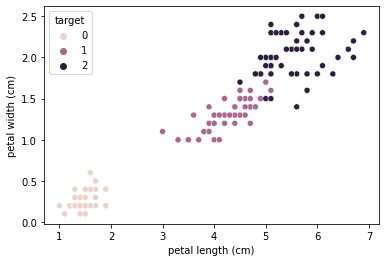

In [197]:
sns.scatterplot(x='petal length (cm)', 
                y ='petal width (cm)',
               data= iris,
               hue= 'target');

- seems to be a relationship between the length and width and species

In [198]:
X= iris.drop(columns='target')

In [207]:
# set X and y
X= iris.drop(columns='target')
y= iris['target']

In [210]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [211]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [212]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [214]:
# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [218]:
# instantiate KNN
knn = KNeighborsClassifier()
# fit
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [220]:
# score train - this is accuracy or pct correct
knn.score(X_train_scaled, y_train)

0.9642857142857143

In [222]:
# score test
knn.score(X_test_scaled, y_test)

1.0

In [223]:
# cross validation
cross_val_score(knn, X_train_scaled, y_train)
# first slice- 91% correct, second slice 95% correct

array([0.91304348, 0.95652174, 0.81818182, 1.        , 0.90909091])

### Classification with Regression
- regular regression tries to predict a continuous number
- classification tries to predict a category, by giving you a value between 0 and 1 using a log function


### example

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_digits, load_iris

In [227]:
cancer = load_breast_cancer()
#print(cancer.DESCR)
#think of the dataset as a class with attributes
#.data
#.target
#.feature_names
X = cancer.data
y = cancer.target